In [1]:
#Firstly imported necessary libararies for use
#!pip install graphviz
#!python.exe -m pip install --upgrade pip
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
import matplotlib.pyplot as plt
import joblib
from sklearn.tree import export_graphviz
import graphviz
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [2]:
loan_df=pd.read_csv('C:/Users/21013219021.uog/Documents/loan_approval_dataset.csv')
loan_df.info()
loan_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4269 entries, 0 to 4268
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   loan_id                   4269 non-null   int64 
 1   no_of_dependents          4269 non-null   int64 
 2   education                 4269 non-null   object
 3   self_employed             4269 non-null   object
 4   income_annum              4269 non-null   int64 
 5   loan_amount               4269 non-null   int64 
 6   loan_term                 4269 non-null   int64 
 7   cibil_score               4269 non-null   int64 
 8   residential_assets_value  4269 non-null   int64 
 9   commercial_assets_value   4269 non-null   int64 
 10  luxury_assets_value       4269 non-null   int64 
 11  bank_asset_value          4269 non-null   int64 
 12  loan_status               4269 non-null   object
dtypes: int64(10), object(3)
memory usage: 433.7+ KB


,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
1,2,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
2,3,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
3,4,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
4,5,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected


In [3]:
#Dropped the empty rows
loan_df.dropna(inplace=True)

In [4]:
categorical_columns = ['no_of_dependents', 'education', 'self_employed','loan_term']
print(categorical_columns)
numerical_columns = ['income_annum', 'loan_amount']
print(numerical_columns)

['no_of_dependents', 'education', 'self_employed', 'loan_term']
['income_annum', 'loan_amount']


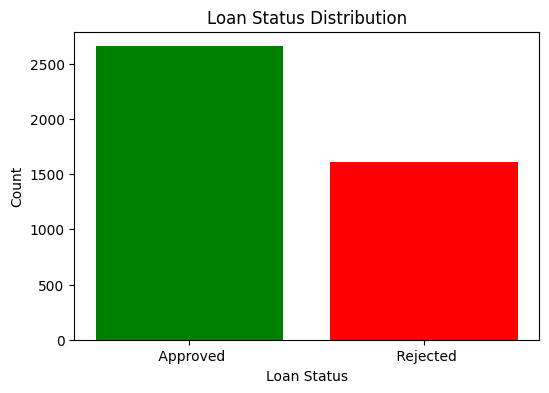

In [5]:
#Drawn the whole status of dataset
loan_status_counts = loan_df['loan_status'].value_counts()

plt.figure(figsize=(6, 4))
plt.bar(loan_status_counts.index, loan_status_counts.values, color=['green', 'red'])
plt.title('Loan Status Distribution')
plt.xlabel('Loan Status')
plt.ylabel('Count')
plt.show()

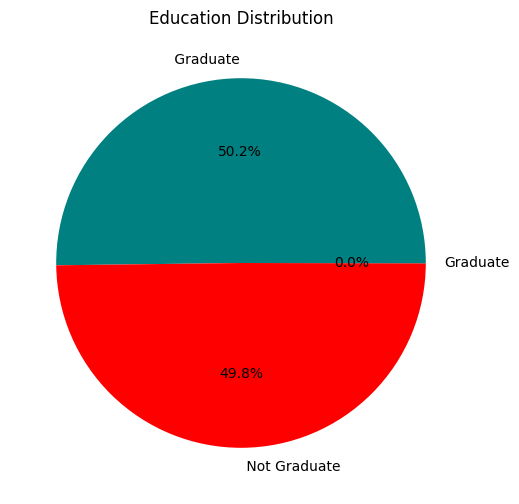

In [6]:
#Drawn the educational status
education_counts = loan_df['education'].value_counts()

plt.figure(figsize=(6, 6))
plt.pie(education_counts, labels=education_counts.index, autopct='%1.1f%%', colors=['teal', 'red'])
plt.title('Education Distribution')
plt.show()

<Figure size 800x600 with 0 Axes>

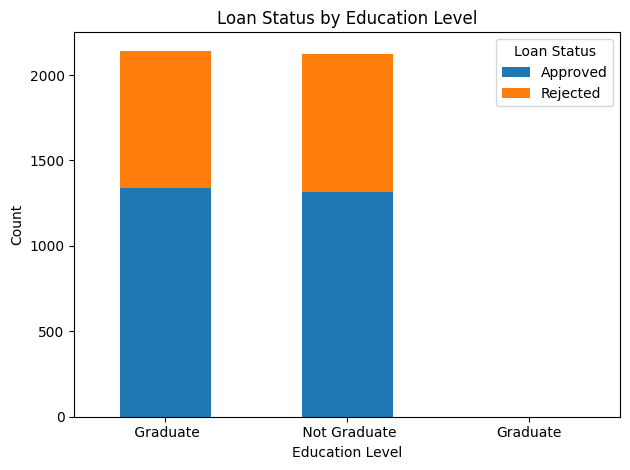

In [7]:
#Now drawn the loan approval status with respect to education
loan_df.columns = loan_df.columns.str.strip()

if 'education' in loan_df.columns and 'loan_status' in loan_df.columns:

    education_loan_status_counts = loan_df.groupby(['education', 'loan_status']).size().unstack()

    plt.figure(figsize=(8, 6))
    education_loan_status_counts.plot(kind='bar', stacked=True)
    plt.title('Loan Status by Education Level')
    plt.xlabel('Education Level')
    plt.ylabel('Count')
    plt.legend(title='Loan Status', loc='upper right', labels=['Approved', 'Rejected'])
    plt.xticks(rotation=0)
    plt.tight_layout()
    plt.show()

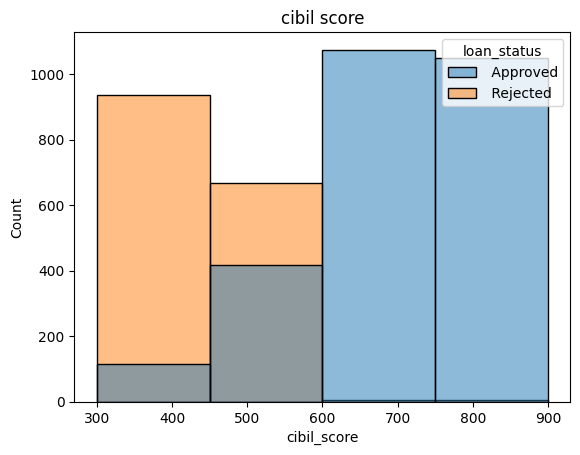

In [8]:
#Drawn...how cibil_score effect the status
sns.histplot(data=loan_df,x='cibil_score',bins=4,hue='loan_status')
plt.title('cibil score')
plt.show()

<Axes: xlabel='no_of_dependents', ylabel='count'>

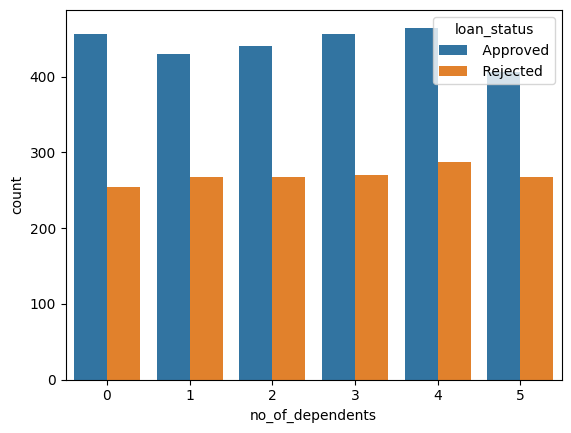

In [9]:
#Drawn the effect of dependents
sns.countplot(x = 'no_of_dependents', data = loan_df, hue = 'loan_status')

Text(0.5, 1.0, 'Self Employed')

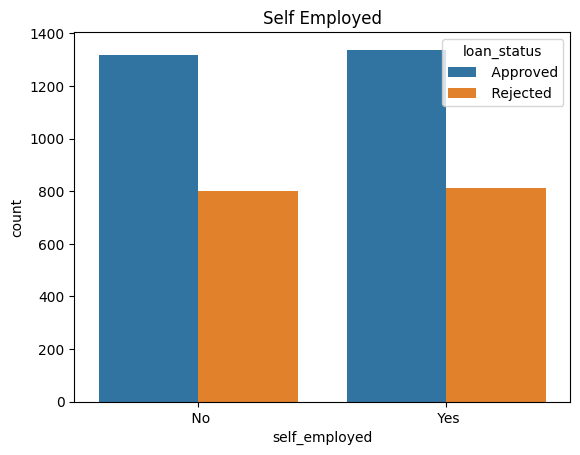

In [10]:
#Effect of employment on loan approval
sns.countplot(x='self_employed', data = loan_df, hue = 'loan_status').set_title('Self Employed')

<Axes: xlabel='loan_term', ylabel='count'>

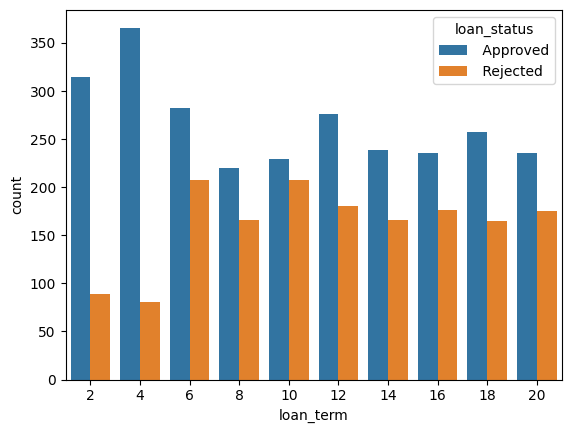

In [11]:
#Drawn the effect of loan term
sns.countplot(x = 'loan_term', data = loan_df, hue = 'loan_status')

       income_annum   loan_amount
count  4.269000e+03  4.269000e+03
mean   5.059124e+06  1.513345e+07
std    2.806840e+06  9.043363e+06
min    2.000000e+05  3.000000e+05
25%    2.700000e+06  7.700000e+06
50%    5.100000e+06  1.450000e+07
75%    7.500000e+06  2.150000e+07
max    9.900000e+06  3.950000e+07


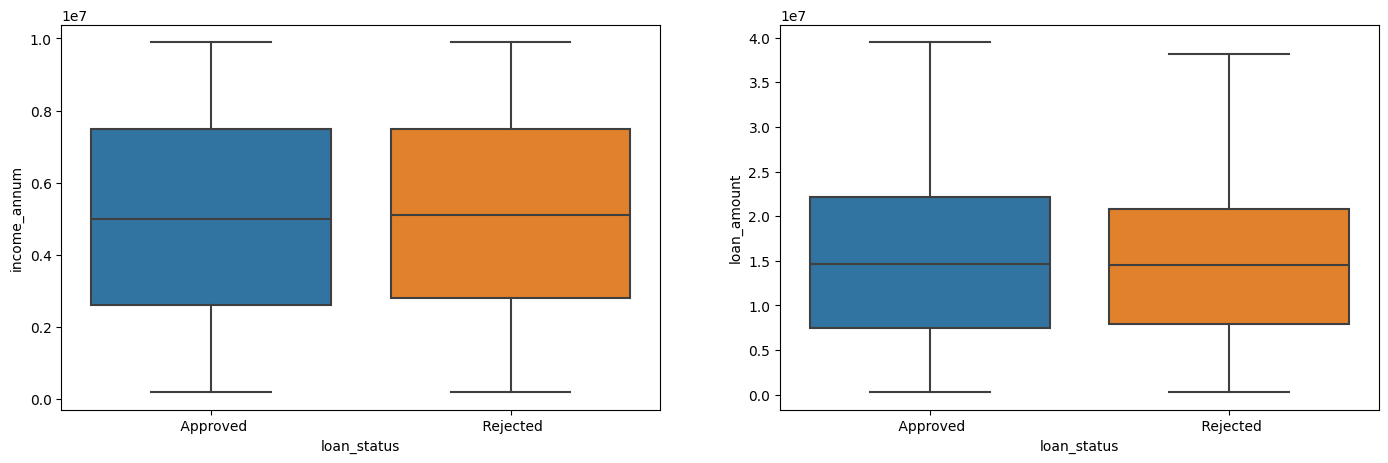

In [12]:
#let's also analyze Numerical Columns
fig,axes = plt.subplots(1,2,figsize=(17,5))
for idx,cat_col in enumerate(numerical_columns):
    sns.boxplot(y=cat_col,data=loan_df,x='loan_status',ax=axes[idx])

print(loan_df[numerical_columns].describe())
plt.subplots_adjust(hspace=1)

In [13]:
#Converted the categorical columns to numerical columns
label_encoder = LabelEncoder()
loan_df['education_numeric'] = label_encoder.fit_transform(loan_df['education'])
loan_df['self_employed_numeric'] = label_encoder.fit_transform(loan_df['self_employed'])
loan_df['self_employed'] = loan_df['self_employed_numeric']
loan_df['education'] = loan_df['education_numeric']
loan_df.drop('education_numeric', axis=1, inplace=True)
loan_df.drop('self_employed_numeric', axis=1, inplace=True)
loan_df.head()

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,2,0,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
1,2,0,1,1,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
2,3,3,0,0,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
3,4,3,0,0,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
4,5,5,1,1,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected


In [14]:
print(loan_df.columns)

Index(['loan_id', 'no_of_dependents', 'education', 'self_employed',
       'income_annum', 'loan_amount', 'loan_term', 'cibil_score',
       'residential_assets_value', 'commercial_assets_value',
       'luxury_assets_value', 'bank_asset_value', 'loan_status'],
      dtype='object')


In [15]:
#Defined the features
features = [
    'no_of_dependents', 'education', 'self_employed',
       'income_annum', 'loan_amount', 'loan_term', 'cibil_score',
       'residential_assets_value', 'commercial_assets_value',
       'luxury_assets_value', 'bank_asset_value'
]

In [16]:
# Define the target variable
target = 'loan_status'

In [17]:
#Defined features in X and targets in y
X = loan_df[features]
y = loan_df[target]
X.shape

(4269, 11)

In [18]:
#Train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [19]:
#Model Trainig
model = RandomForestClassifier(n_estimators=10, random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(n_estimators=10, random_state=42)

In [20]:
#Printed the training score
print(f"Training Score:{model.score(X_train,y_train)*100}%")

Training Score:99.87503905029679%


In [21]:
#Printed the testing score
print(f"Test score:{model.score(X_test,y_test)*100}%")

Test score:97.47191011235955%


In [22]:
#Importance of each feature
feature_importances = model.feature_importances_
feature_importances

array([0.009652  , 0.00278542, 0.00218302, 0.01874971, 0.03519842,
       0.05998575, 0.79248221, 0.01607451, 0.02075013, 0.02562125,
       0.01651758])

In [23]:
#Made a graph for feature importances 
export_graphviz(model.estimators_[9],  
                out_file="forest1.dot",  
                class_names=model.classes_,
                feature_names=features,
                impurity=False,
                filled=True)

In [24]:
with open('forest1.dot') as f:
    graphData = f.read()
    graphviz.Source(graphData)

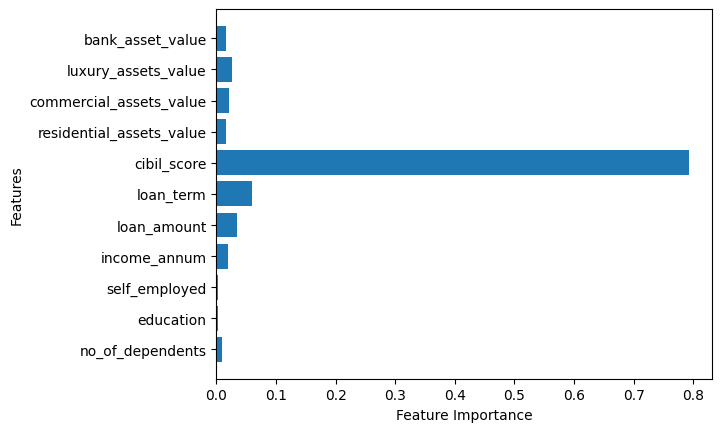

In [25]:
#Plotted the graph of feature importance
def plot_graph(model):
    n_features = len(features)
    plt.barh(range(n_features),
             model.feature_importances_,
             align='center')
    
    plt.yticks(np.arange(n_features), features)
    plt.xlabel("Feature Importance")
    plt.ylabel("Features")

plot_graph(model)
plt.show()


In [26]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier

def train_and_predict_loan_approval():
    # Your input data
    no_of_dependents = int(input("Enter the number of dependents: "))
    education = int(input("Enter education (0 for Graduate and 1 for Not Graduate): "))
    self_employed = int(input("Are you self-employed? (1 for Yes and 0 for No): "))
    income_annum = float(input("Enter the annual income: "))
    loan_amount = float(input("Enter the loan amount: "))
    loan_term = int(input("Enter the loan term (in months): "))
    cibil_score = int(input("Enter the CIBIL score: "))
    residential_assets_value = float(input("Enter the residential assets value: "))
    commercial_assets_value = float(input("Enter the commercial assets value: "))
    luxury_assets_value = float(input("Enter the luxury assets value: "))
    bank_asset_value = float(input("Enter the bank asset value: "))

    # Creating a DataFrame with the input data
    user_data = pd.DataFrame(
        [[no_of_dependents, education, self_employed, income_annum, loan_amount, loan_term, cibil_score,
        residential_assets_value, commercial_assets_value, luxury_assets_value, bank_asset_value]],
        columns=['no_of_dependents', 'education', 'self_employed', 'income_annum', 'loan_amount', 'loan_term',
                 'cibil_score', 'residential_assets_value', 'commercial_assets_value', 'luxury_assets_value', 'bank_asset_value']
    )
    
    model = RandomForestClassifier()

    # Training the model
    model.fit(X_train, y_train)

    # Making predictions
    prediction = model.predict(user_data)
    print(f"\nLoan Approval Prediction: {prediction}")

# Call the function to train and predict
train_and_predict_loan_approval()


Enter the number of dependents: 2
Enter education (0 for Graduate and 1 for Not Graduate): 1
Are you self-employed? (1 for Yes and 0 for No): 2
Enter the annual income: 1
Enter the loan amount: 2
Enter the loan term (in months): 12
Enter the CIBIL score: 12
Enter the residential assets value: 233
Enter the commercial assets value: 435
Enter the luxury assets value: 4354
Enter the bank asset value: 323243

Loan Approval Prediction: [' Rejected']
